In [1]:
#-----------------------------------------------------------------------------
# cm1_elevation_analysis.py
#
# Roger Riggin          # CSTAR Research Assistantship
#
#    Latest Update: 9/6/2021
#
#
#-----------------------------------------------------------------------------


In [2]:
#-----------------------------------------------------------------------------
# Import external modules
#-----------------------------------------------------------------------------
import os
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects 
import numpy as np
import pandas as pd
from scipy import stats



In [3]:
#-----------------------------------------------------------------------------
# Define Custom Functions
#-----------------------------------------------------------------------------


#------------------------------------
# Begin Trimean
#------------------------------------

# Description: The trimean is a weighted average of the median and the quartiles, 
#              with the median receiving twice the weight of each of the quartiles
def trimean( q1, q2, q3 ):
    
    # Intitalize a retval
    retval = 0.0
    
    # Compute the trimean (Formula from Pg. 26)
    retval = ( q1 + 2*q2 + q3 ) / 4.0 
    
    # Return the trimean back to the user
    return( retval )

#------------------------------------
# End Trimean
#------------------------------------


#------------------------------------
# Begin Median Absolute Deviation
#------------------------------------

# Description: The median (rather than the mean) is subtracted from each data value, 
#              any negative signs are removed by the absolute value (rather than squaring) 
#              operation, and the center of these absolute differences is located by their 
#              median (rather than their mean).

def median_absolute_diff( arr ):
    
    # Initialize a revalue
    retval = 0.0
    
    # Get the median value of the input dataset
    q2 = np.percentile( arr, [50] )
    
    # Initialize an empty array of size input array for data transformation
    transformation = np.zeros( 
                              shape = len(arr) 
                             )
    
    # Loop through each entry of the data array
    for i in range( 0, len( arr) ):
        
        # Set the i-th value of the transformation array
        transformation[i] = abs( arr[i] - q2 )
        
    # Compute MAD by taking median of tranformation array
    retval = np.percentile( transformation, [50] )
    
    # Return MAD 
    # Note: retval was of type array w/ size 1 so need to access the element to get numeric value as returned value
    return( retval[0] )

#------------------------------------
# End Mean Absolute Deviation
#------------------------------------


#------------------------------------
# Begin Yule-Kendall Index
#------------------------------------

# Description: Computed by comparing the distance between the median and each of the 
#              two quartiles. If the data are right-skewed, at least in the central 50% 
#              of the data, the distance to the median will be greater from the upper 
#              quartile than from the lower quartile

def yk_index( arr ):

    # Initialize a revalue
    retval = 0.0
    
    # Get the quartile value of the input dataset
    q1, q2, q3 = np.percentile( arr, [25, 50, 75] )
    
    # Compute IQR of input dataset
    iqr = q3 - q1
    
    # Compute Yule-Kendall Index
    retval = ( q1 - 2*q2 + q3 ) / iqr
    
    # Return computation
    return( retval )

#------------------------------------
# End Yule-Kendall Index
#------------------------------------



In [4]:
#-----------------------------------------------------------------------------
# Begin Main Script
#-----------------------------------------------------------------------------

# Store program name as string
program = 'cm1_elevation_analysis.py'

# Record Script start time
startTime = datetime.now()

# Report program status to terminal
print( '\nBegin Program: {}'.format ( program ) )




Begin Program: cm1_elevation_analysis.py


In [6]:
#-----------------------------------------------------------------------------
# Set working directory
#-----------------------------------------------------------------------------

# Path to CSV for this assignment (Will need to change to run on other PCs)
wkdir = ( 
         'C:/Users/rriggin/Desktop/rriggin/CSTAR/GIS/Peak_Elevations/' 
        )

# Change the working directory 
os.chdir( wkdir )

# Verify to terminal that we are in the correct directory
print( '\nCurrent Directory: \t{}'.format( os.getcwd() ) )




Current Directory: 	C:\Users\rriggin\Desktop\rriggin\CSTAR\GIS\Peak_Elevations


In [9]:
#-----------------------------------------------------------------------------
# 1: Read in CSV Data
#-----------------------------------------------------------------------------

# Define the filename as a string
filenames = [ 'cross_peak_elv.csv', 'nc_peak_elv.csv' ]

# Open the file containing our data (Read-Only)
data = open( filenames [0], 'r' )

# Report program status to the terminal
print( '\n\t Now opening input file: {} '.format( filenames[0] ) )

# Store the raw data as a pandas dataframe
df = pd.read_csv( 
                 filenames[0],
                 delimiter = ",", 
                 header = 0,
                 skiprows = (0) 
                )

# Report program status to terminal
print( '\n\t Raw data successfully stored into dataframe structure...')

# Close the file containing our data
data.close() 

# Report program status to the terminal
print( '\n\t Now closing input file: {} '.format( filenames[0] ) )



	 Now opening input file: cross_peak_elv.csv 

	 Raw data successfully stored into dataframe structure...

	 Now closing input file: cross_peak_elv.csv 


In [10]:
#-----------------------------------------------------------------------------
# 1) Explore headers
#-----------------------------------------------------------------------------

# Determine the number of columns
numCols = len( df.columns )

# Loop through all the columns
for i in range( numCols ):
        
        # Report the column name back to the terminal
        print( '\n\t Column {} represents: {}'.format( i + 1, df.columns[i] ) )
        


	 Column 1 represents: OBJECTID

	 Column 2 represents: Unique_ID

	 Column 3 represents: Sounding_Type

	 Column 4 represents: Event_Date

	 Column 5 represents: Classification

	 Column 6 represents: Longitude

	 Column 7 represents: Latitude

	 Column 8 represents: Elevation


In [9]:
#-----------------------------------------------------------------------------
# 2) For the data in column 3, calculate 3 different measures of Location
#-----------------------------------------------------------------------------

# Pull out the elevation data
col3 = df.iloc[:,7]


# Mean
#-----
# Recall this measure is neither robust or resistant due to gaussian-assumption requirements!

# Compute the mean value 
mean_col3 = np.mean( col3 )

# Round the value for cleaner reporting
mean_col3 = round( mean_col3, 4 )

# Report value back to terminal
print( '\n\tThe mean value of elevation is {} m'.format( mean_col3 ) )


# Median
#-------
# This is the most common measure that is both resistant and robust

# Generate the quartiles of column 3 (matlab.prctile() equivalent)
q3, q2, q1 = np.percentile( col3, [75, 50, 25] )

# Store the median value (q2 = median value) 
med_col3 = q2

# Round the value for cleaner reporting
med_col3 = round( med_col3, 4 )

# Report value back to terminal
print( '\n\tThe median value of Column 3 is {}\u00B0C'.format( med_col3 ) )


# Trimean
#--------
# This measure is resistant due to weighted-averaging of quartiles

# Compute trimean using user-defined function
trimean_col3 = trimean( q1, q2, q3 )

# Round value for cleaner reporting
trimean_col3 = round( trimean_col3, 4 )

# Report value back to terminal
print( '\n\tThe trimean value of Column 3 is {}\u00B0C'.format( trimean_col3 ) )


# Trimmed Mean
#-------------
# Resistant measure of location by removing tail outliers

# Proportion of trimming desired
prop = 0.2

# Compute trimmed mean using scipy.stats method
trim_mean_col3 = stats.trim_mean(
                                 a = col3,                 # Dataset
                                 proportiontocut = prop,   # Percent of trimming for both ends of dataset
                                 axis = None               # Axis in which trimming is performed on
                                )

# Round value for cleaner reporting
trim_mean_col3 = round( trim_mean_col3, 4 )

# Report value back to terminal
print( '\n\tThe {} % trimmed mean value of Column 3 is {}\u00B0C'.format( prop * 100, trim_mean_col3 ) )




	The mean value of Column 3 is 0.0045°C

	The median value of Column 3 is -0.0923°C

	The trimean value of Column 3 is -0.067°C

	The 20.0 % trimmed mean value of Column 3 is -0.0665°C


In [10]:
#-----------------------------------------------------------------------------
# 3) For the data in column 3, calculate 3 different measures of Spread
#-----------------------------------------------------------------------------

# Interquartile Range
#--------------------
# Good measure of central (50% about the median) spread

# Use 1st & 3rd quartiles to compute IQR
iqr = q3 - q1

# Round the value for cleaner reporting
iqr = round( iqr, 4 )

# Report value back to terminal
print( '\n\tThe IQR for column 3 is {}\u00B0C'.format( iqr) )


# Sample Standard Deviation
#--------------------------
# Neither robust or resistant as it depends on the sample mean!

# Compute the standard deviation
std_col3 = np.std( col3 )

# Round the value for cleaner reporting
std_col3 = round( std_col3, 4 )

# Report value back to terminal
print( '\n\tThe standard deviation of Column 3 is {}\u00B0C'.format( std_col3 ) )


# Sample Variance
#----------------
# Neither robust or resistant as it depends on the sample mean (Due to STD in computation)!

# Compute the variance (std^2)
var_col3 = std_col3 ** 2

# Round the value for cleaner reporting
var_col3 = round( var_col3, 4 )

# Report value back to terminal
print( '\n\tThe variance of Column 3 is {}\u00B0C'.format( var_col3 ) )


# Mean Absolute Distance (MAD)
#-----------------------------
# More inclusive of entire dataset than IQR

# Compute MAD
mad_col3 = median_absolute_diff( arr = col3[:] )

# Round the value for cleaner reporting
mad_col3 = round( mad_col3, 4 )

# Report value back to terminal
print( '\n\tThe Median Absolute Deviation of Column 3 is {}\u00B0C'.format( mad_col3 ) )


# Trimmed Variance
#-----------------
# Omit a proportion of the largest and smallest values and compute the analogue of the sample variance

# Compute trimmed variance using scipy.stats method
tvar_col3 = stats.tvar(
                       a = col3,                  # Input data array
                       limits = ( q1, q3 ),       # Trimming lower & upper limits (Must be data value)
                       inclusive = (True, True),  # Include both limits in computation 
                       axis = None,               # Trimming Axis
                       ddof = 1                   # Degrees of Freedom
                      )

# Round the value for cleaner reporting
tvar_col3 = round( tvar_col3, 4 )

# Report value back to terminal
print( '\n\tThe Trimmed Variance about 50% of the dataset of Column 3 is {}\u00B0C'.format( tvar_col3 ) )




	The IQR for column 3 is 0.4186°C

	The standard deviation of Column 3 is 0.3743°C

	The variance of Column 3 is 0.1401°C

	The Median Absolute Deviation of Column 3 is 0.1955°C

	The Trimmed Variance about 50% of the dataset of Column 3 is 0.0136°C


In [11]:
#-----------------------------------------------------------------------------
# 4) For the data in column 3, calculate 2 different measures of Symmetry
#-----------------------------------------------------------------------------

# Sample Skewness Coefficent
#---------------------------
# Neither robust or resistant as it depends on the sample mean (Due to STD in computation)!
# Extremely sensitive to outliers

# Compute skewness coefficent
skew_col3 = stats.skew( col3, bias = False )

# Round the value for cleaner reporting
skew_col3 = round( skew_col3, 4 )

# Report value back to terminal
print( '\n\tThe skewness coefficent of the dataset of Column 3 is {}\u00B0C'.format( skew_col3 ) )


# Yule-Kendall Index
#-------------------
# Computed by comparing the distance between the median and each of the two quartiles

# Compute the YK-Index using custom function
yk_col3 = yk_index( col3 )

# Round the value for cleaner reporting
yk_col3 = round( yk_col3, 4 )

# Report value back to terminal
print( '\n\tThe Yule-Kendall Index of the dataset of Column 3 is {}\u00B0C'.format( yk_col3 ) )




	The skewness coefficent of the dataset of Column 3 is 0.9638°C

	The Yule-Kendall Index of the dataset of Column 3 is 0.2421°C


In [12]:
#-----------------------------------------------------------------------------
# 5) Which measures of Location, Spread, and Symmetry are 
# Robust and/or Resistant to outliers? Write your answer as a comment 
# in your script.
#-----------------------------------------------------------------------------

# Robust: Numerical summary techniques that are not sensitive to a particular 
#         assumption about the overall nature of the data

# Resistant: Numerical summary techniques that are not influenced a small 
#            number of outliers or wild data.

# Techniques that are Robust/Resistant to Outliers
#-------------------------------------------------

# 1) Median (Robust Locational Measure)
# 2) Trimean (Robust Locational Measure)
# 3) Trimmed Mean (Resistant Locational Measure)
# 4) Interquartile Range (Robust Spread Measure)
# 5) Median Absolute Deviation (Robust Spread Measure)
# 6) Trimmed Variance (Resistant Spread Measure)
# 7) Yule-Kendall Inde (Robust Symmetery Measure)


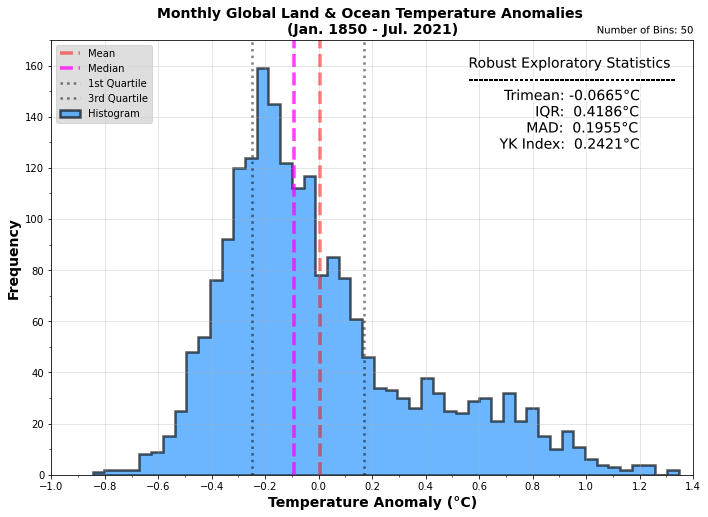

In [13]:
#-----------------------------------------------------------------------------
# 6) Make a histogram of the data in column 3, using best practices 
# on labeling
#-----------------------------------------------------------------------------

# Create a figure 
fig = plt.figure( figsize = ( 11.5, 8 ) )

# Create an axes object
ax = fig.add_subplot( 1, 1, 1 )

# Add a x-axis label
ax.set_xlabel( 
              xlabel = 'Temperature Anomaly (\u00B0C)',
              loc = 'center',
              fontsize = 14,
              fontweight = 'bold'
             )

# Collect the min/max values to build the x-axis 
min_x = round( np.amin( col3 ), 1 )
max_x = round( np.amax( col3 ), 1 )

# Define the x-axis viewing window
ax.set_xlim( min_x - 0.025 , max_x + 0.025 )

# Create a list of values for the x-axis tickmarks
tick_list = np.arange( min_x - 0.2, max_x + 0.2, 0.1 )

# Explicitly set the x-axis tick marks
ax.set_xticks( 
              ticks = tick_list[::2],
              minor = False
             )
ax.set_xticks( 
              ticks = tick_list[:],
              minor = True
             )

# Add a y-axis label
ax.set_ylabel( 
              ylabel = 'Frequency',
              loc = 'center',
              fontsize = 14,
              fontweight = 'bold'
             ) 

# Add a title
plt.title(
          label = 'Monthly Global Land & Ocean Temperature Anomalies \n(Jan. 1850 - Jul. 2021)',
          fontsize = 14,
          fontweight = 'bold'
         )

# Construct the histogram of column 3 data
bins = 50
hist = ax.hist(
               x = col3,                       # Data
               bins = bins,                    # Number of bins
               histtype = 'stepfilled',        # Visualization type
               align = 'mid',                  # Location relative to tickmark
               orientation = 'vertical',       # Choose the frequency axis 
               rwidth = 0.8,                   # Bar size
               color = 'dodgerblue',           # Bar Color      
               edgecolor = 'black',            # Edge Color                 
               linewidth = 2.5,                # Edge Width     
               label = 'Histogram',            # Legend Label
               stacked = False,                # Data stacking
               alpha = 0.65                    # Transparency
              )

# Explicitly set y-ticks
ax.set_yticks( 
              ticks = np.arange( 0, np.amax(hist[0]) + 20, 20 ),
              minor = False
             )
ax.set_yticks( 
              ticks = np.arange( 0, np.amax(hist[0]) + 20, 10 ),
              minor = True
             )

# Add a grid
ax.grid( alpha = 0.4 )

# Emphasize the mean value 
line1 = ax.axvline( 
                    x = mean_col3,                      # X-Axis var
                    color = 'red',                      # Plot color
                    linestyle = '--',                    # Linestyle
                    linewidth = 3.5,                    # Linewidth
                    alpha = 0.5 ,                       # Transparancy
                    label = 'Mean'                      # Legend Label
                   )

# Emphasize the median value 
line2 = ax.axvline( 
                    x = q2,                             # X-Axis var
                    color = 'magenta',                  # Plot color
                    linestyle = '--',                   # Linestyle
                    linewidth = 3.5,                    # Linewidth
                    alpha = 0.75 ,                      # Transparancy
                    label = 'Median'                    # Legend Label
                   )

# Emphasize the quartile value 
line3 = ax.axvline( 
                    x = q1,                             # X-Axis var
                    color = 'black',                    # Plot color
                    linestyle = ':',                    # Linestyle
                    linewidth = 2.5,                    # Linewidth
                    alpha = 0.5 ,                       # Transparancy
                    label = '1st Quartile'              # Legend Label
                   )

# Emphasize the quartile value 
line4 = ax.axvline( 
                    x = q3,                             # X-Axis var
                    color = 'black'  ,                  # Plot color
                    linestyle = ':',                    # Linestyle
                    linewidth = 2.5,                    # Linewidth
                    alpha = 0.5 ,                       # Transparancy
                    label = '3rd Quartile'              # Legend Label
                   )

# Create a legend 
ax.legend( loc = 2, facecolor = 'lightgrey', framealpha = 0.75 )

# Define an annotation string
stat_txt = (
            'Robust Exploratory Statistics' + 
            '\n-----------------------------------------' +
            '\n        Trimean: {}\u00B0C'.format( trim_mean_col3 ) +
            '\n               IQR:  {}\u00B0C'.format( iqr ) +
            '\n             MAD:  {}\u00B0C'.format( mad_col3 ) +
            '\n       YK Index:  {}\u00B0C'.format( yk_col3 )
           )

# Annotate stats to plot
plt_txt = plt.text(
                   x = 0.65,
                   y = 0.75,
                   s = stat_txt,
                   fontsize = 14,
                   transform = ax.transAxes
                  )

# Annotate number of bins
numBins = plt.text(
                   x = 0.85,
                   y = 1.015,
                   s = "Number of Bins: {}".format( bins ),
                   fontsize = 10,
                   transform = ax.transAxes
                  )

# Add a halo around all annotations
plt.setp( 
         [ plt_txt, numBins ],
         path_effects=[ PathEffects.withStroke( linewidth = 3.5, foreground = "w", alpha = 0.85 ) ]
        )

# Save plot to working directory
plt.savefig( 
            wkdir + 'rriggin_ps3_hist.pdf',
            bbox_inches = "tight",
            dpi = 300 
           )



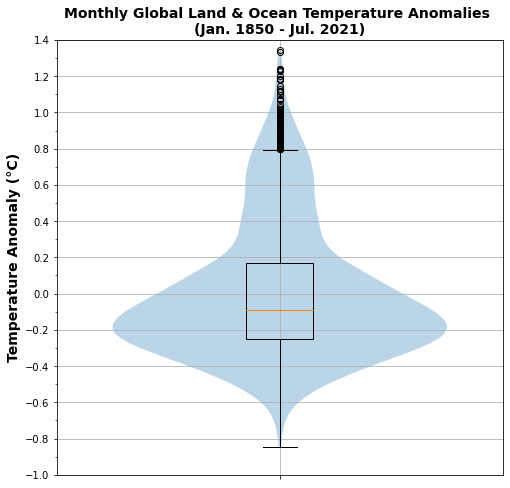

In [14]:
#-----------------------------------------------------------------------------
# 7) Make a boxplot of the data in column 3, using best practices on 
# labeling
#-----------------------------------------------------------------------------

# Create a figure 
fig = plt.figure( figsize = ( 8, 8 ) )

# Create an axes object
ax = fig.add_subplot( 1, 1, 1 )

# Add a title
plt.title(
          label = 'Monthly Global Land & Ocean Temperature Anomalies \n(Jan. 1850 - Jul. 2021)',
          fontsize = 14,
          fontweight = 'bold'
         )

# Define the y-axis viewing window
ax.set_ylim( min_x - 0.025 , max_x + 0.025 )

# Create a list of values for the y-axis tickmarks
tick_list = np.arange( min_x - 0.2, max_x + 0.2, 0.1 )

# Explicitly set the y-axis tick marks
ax.set_yticks( 
              ticks = tick_list[::2],
              minor = False
             )
ax.set_yticks( 
              ticks = tick_list[:],
              minor = True
             )

# Add a y-axis label
ax.set_ylabel( 
              ylabel = 'Temperature Anomaly (\u00B0C)',
              loc = 'center',
              fontsize = 14,
              fontweight = 'bold'
             )

# Add a grid
ax.grid()

# Create a violin plot 
ax.violinplot(
              dataset = col3,
              widths = 0.75,
              showmeans = False,
              showextrema = False,
              showmedians = False,
              points = 100
             )

# Overlay a boxplot
ax.boxplot(
           x = col3,
           notch = False,
           meanline = False,
           showmeans = False,
           showfliers = True,
           labels = ['']
          )

# Save plot to working directory
plt.savefig( 
            wkdir + 'rriggin_ps3_box.pdf',
            bbox_inches = "tight",
            dpi = 300 
           )


In [15]:
#-----------------------------------------------------------------------------
# End Main Script
#-----------------------------------------------------------------------------

# Report program status to terminal
print( '\nEnd Program: {}'.format( program ) )

# Report the time required to run the program
print( "\nProgram Runtime: {}".format( datetime.now() - startTime ) )




End Program: rriggin_ps_3.py

Program Runtime: 0:00:00.652435
